# SMU DS - credit_risk_classification - Model20 - Challenge

In [94]:
# Import required libraries and dependencies
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# data science
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

# ML Helpers/Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

# fun ones
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

---

# Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [95]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df = pd.read_csv("Resources/lending_data.csv")

# Review the DataFrame
df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB


In [97]:
df.describe()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,49221.949804,0.377318,3.826610,0.392308,19221.949804,0.032243
std,2093.223153,0.889495,8371.635077,0.081519,1.904426,0.582086,8371.635077,0.176646
min,5000.000000,5.250000,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,44800.000000,0.330357,3.000000,0.000000,14800.000000,0.000000
50%,9500.000000,7.172000,48100.000000,0.376299,4.000000,0.000000,18100.000000,0.000000
75%,10400.000000,7.528000,51400.000000,0.416342,4.000000,1.000000,21400.000000,0.000000
max,23800.000000,13.235000,105200.000000,0.714829,16.000000,3.000000,75200.000000,1.000000


In [98]:
df.loan_status.value_counts()

0    75036
1     2500
Name: loan_status, dtype: int64

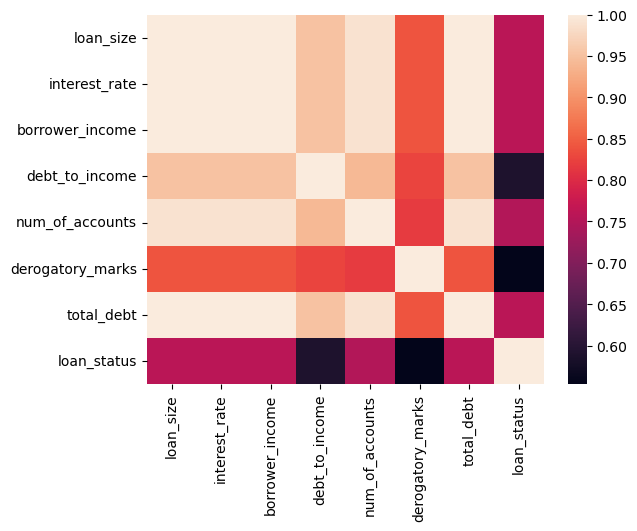

In [99]:
corrs = df.corr()
sns.heatmap(corrs)
plt.show()

In [100]:
corrs

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
loan_size,1.000000,0.999905,0.999893,0.951847,0.988507,0.840407,0.999893,0.758846
interest_rate,0.999905,1.000000,0.999994,0.951938,0.988515,0.840596,0.999994,0.758900
borrower_income,0.999893,0.999994,1.000000,0.951950,0.988509,0.840577,1.000000,0.758890
debt_to_income,0.951847,0.951938,0.951950,1.000000,0.941078,0.825668,0.951950,0.589305
num_of_accounts,0.988507,0.988515,0.988509,0.941078,1.000000,0.818320,0.988509,0.749802
derogatory_marks,0.840407,0.840596,0.840577,0.825668,0.818320,1.000000,0.840577,0.553187
total_debt,0.999893,0.999994,1.000000,0.951950,0.988509,0.840577,1.000000,0.758890
loan_status,0.758846,0.758900,0.758890,0.589305,0.749802,0.553187,0.758890,1.000000


In [101]:
corrs["loan_status"].sort_values(ascending=False)

loan_status         1.000000
interest_rate       0.758900
borrower_income     0.758890
total_debt          0.758890
loan_size           0.758846
num_of_accounts     0.749802
debt_to_income      0.589305
derogatory_marks    0.553187
Name: loan_status, dtype: float64

### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [102]:
# Separate the data into labels and features

# Separate the X variable, the features
X = df.drop(columns=["loan_status"])

# Separate the y variable, the labels
y = df["loan_status"]

In [103]:
# Review the y variable Series
y[0:5]

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [104]:
# Review the X variable DataFrame
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [105]:
df.loan_status.value_counts()

0    75036
1     2500
Name: loan_status, dtype: int64

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [106]:
# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(58152, 7) (58152,)
(19384, 7) (19384,)


---

# Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [107]:
 def doMLClassification(model, X_train, y_train, X_test, y_test):
    # fit the model
    model.fit(X_train, y_train)

    # predict the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    test_proba = model.predict_proba(X_test)[:,1]

    # make some pretty graphs
    print("TRAINING SET METRICS")
    print(confusion_matrix(y_train, train_preds))
    print(classification_report(y_train, train_preds))
    print()
    print("TESTING SET METRICS")
    print(confusion_matrix(y_test, test_preds))
    print(classification_report(y_test, test_preds))

    # ROC Curve
    auc = roc_auc_score(y_test, test_proba)
    fpr, tpr, thresholds = roc_curve(y_test, test_proba)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(F"AUC: {auc}")
    plt.show()

In [108]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logistic_regression_model = LogisticRegression(solver='lbfgs', random_state=1)

# Fit the model using training data
lr_model = logistic_regression_model.fit(X_train, y_train)

TRAINING SET METRICS
[[55980   297]
 [  198  1677]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56277
           1       0.85      0.89      0.87      1875

    accuracy                           0.99     58152
   macro avg       0.92      0.94      0.93     58152
weighted avg       0.99      0.99      0.99     58152


TESTING SET METRICS
[[18679    80]
 [   67   558]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.89      0.88       625

    accuracy                           0.99     19384
   macro avg       0.94      0.94      0.94     19384
weighted avg       0.99      0.99      0.99     19384



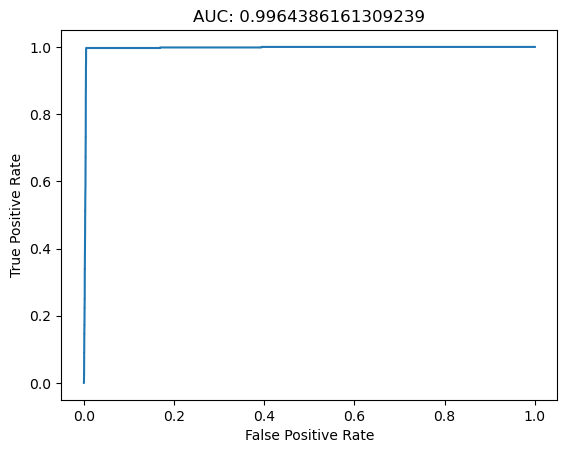

In [109]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
lr = LogisticRegression()

# Fit the model using training data
doMLClassification(lr, X_train, y_train, X_test, y_test)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [110]:
# Make a prediction using the testing data
test_predictions = logistic_regression_model.predict(X_test)
pd.DataFrame({'Predictions': test_predictions, 'Actual': y_test})

,Predictions,Actual
36831,0,0
75818,0,1
36563,0,0
13237,0,0
43292,0,0
...,...,...
38069,0,0
36892,0,0
5035,0,0
40821,0,0


In [111]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
ros = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
X_ros_model, y_ros_model = ros.fit_resample(X,y)

In [112]:
from collections import Counter
# Count the distinct values of the resampled labels data
print(Counter(X_ros_model))
print(Counter(y_ros_model))
print(f"The y_ros_model resampled data is equivalently split")

Counter({'loan_size': 1, 'interest_rate': 1, 'borrower_income': 1, 'debt_to_income': 1, 'num_of_accounts': 1, 'derogatory_marks': 1, 'total_debt': 1})
Counter({0: 75036, 1: 75036})
The y_ros_model resampled data is equivalently split


In [113]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier = LogisticRegression(solver='lbfgs', random_state=1)

# Fit the model using the resampled training data
classifier.fit(X_ros_model, y_ros_model)
# Make a prediction using the testing data
predictions = classifier.predict(X_ros_model)
pd.DataFrame({'Predictions': predictions, 'Actual': y_ros_model})

,Predictions,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
150067,1,1
150068,1,1
150069,1,1
150070,1,1


### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [114]:
# Print the balanced_accuracy score of the model
print(f"The balanced accuracy score of the model is: {balanced_accuracy_score(y_test, test_predictions)}")

The balanced accuracy score of the model is: 0.9442676901753825


In [115]:
# Generate a confusion matrix for the model
cf_test_matrix = confusion_matrix(y_test, test_predictions)
cf_test_matrix   

array([[18679,    80],
       [   67,   558]], dtype=int64)

In [116]:
# Print the classification report for the model
testing_report = classification_report(y_test, test_predictions)
print(testing_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.89      0.88       625

    accuracy                           0.99     19384
   macro avg       0.94      0.94      0.94     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The logistic regression model was 95% accurate at predicting the healthy vs high-risk loan labels

In [117]:
# Test Other Algorithms

TRAINING SET METRICS
[[55951   326]
 [   14  1861]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56277
           1       0.85      0.99      0.92      1875

    accuracy                           0.99     58152
   macro avg       0.93      0.99      0.96     58152
weighted avg       0.99      0.99      0.99     58152


TESTING SET METRICS
[[18669    90]
 [    5   620]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.99      0.93       625

    accuracy                           1.00     19384
   macro avg       0.94      0.99      0.96     19384
weighted avg       1.00      1.00      1.00     19384



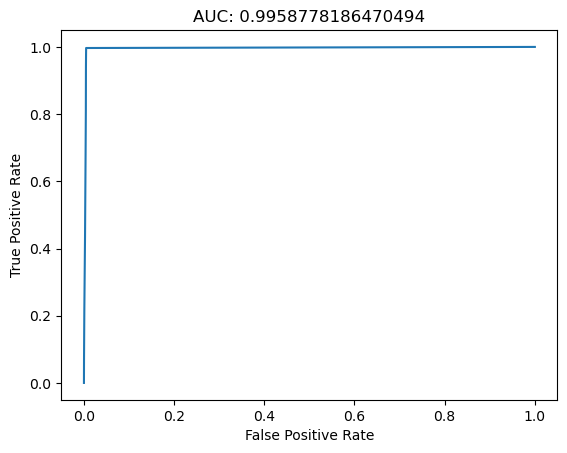

In [118]:
# init the model
knn = KNeighborsClassifier(n_neighbors=25)
doMLClassification(knn, X_train, y_train, X_test, y_test)

TRAINING SET METRICS
[[56150   127]
 [   29  1846]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56277
           1       0.94      0.98      0.96      1875

    accuracy                           1.00     58152
   macro avg       0.97      0.99      0.98     58152
weighted avg       1.00      1.00      1.00     58152


TESTING SET METRICS
[[18681    78]
 [   82   543]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.87      0.87       625

    accuracy                           0.99     19384
   macro avg       0.94      0.93      0.93     19384
weighted avg       0.99      0.99      0.99     19384



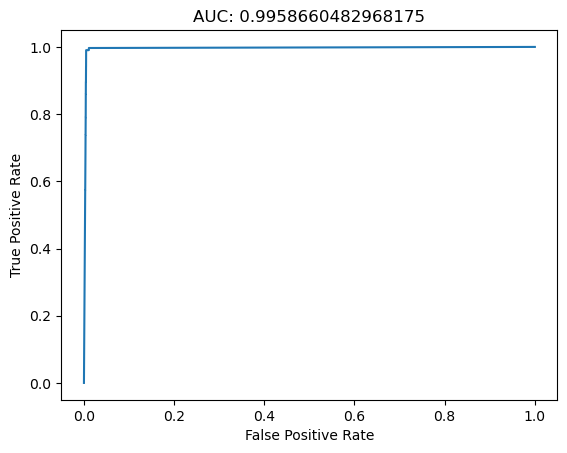

In [119]:
# init the model
rf = RandomForestClassifier(random_state=42)
doMLClassification(rf, X_train, y_train, X_test, y_test)

TRAINING SET METRICS
[[55954   323]
 [   15  1860]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56277
           1       0.85      0.99      0.92      1875

    accuracy                           0.99     58152
   macro avg       0.93      0.99      0.96     58152
weighted avg       0.99      0.99      0.99     58152


TESTING SET METRICS
[[18669    90]
 [    5   620]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.99      0.93       625

    accuracy                           1.00     19384
   macro avg       0.94      0.99      0.96     19384
weighted avg       1.00      1.00      1.00     19384



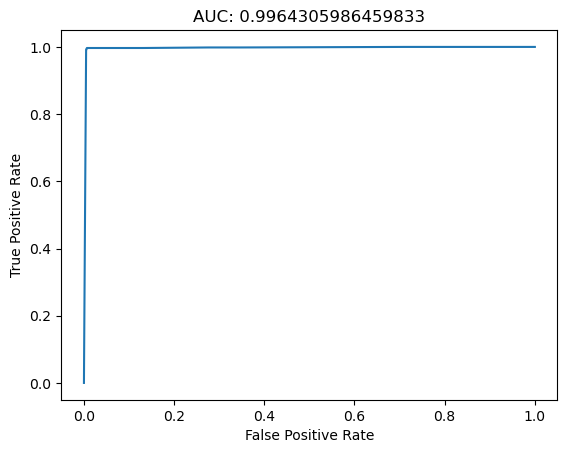

In [120]:
# init the model
ada = AdaBoostClassifier(random_state=42)
doMLClassification(ada, X_train, y_train, X_test, y_test)

TRAINING SET METRICS
[[55971   306]
 [   15  1860]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56277
           1       0.86      0.99      0.92      1875

    accuracy                           0.99     58152
   macro avg       0.93      0.99      0.96     58152
weighted avg       1.00      0.99      0.99     58152


TESTING SET METRICS
[[18670    89]
 [   12   613]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.98      0.92       625

    accuracy                           0.99     19384
   macro avg       0.94      0.99      0.96     19384
weighted avg       1.00      0.99      0.99     19384



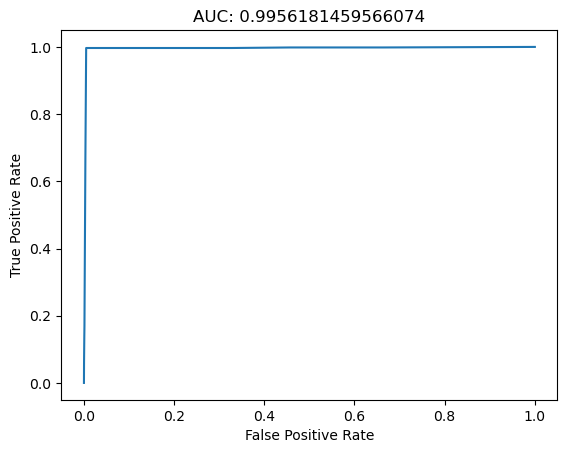

In [121]:
 # init the model
xgb = XGBClassifier(random_state=42)
doMLClassification(xgb, X_train, y_train, X_test, y_test)

[LightGBM] [Info] Number of positive: 1875, number of negative: 56277
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000888 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1210
[LightGBM] [Info] Number of data points in the train set: 58152, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.032243 -> initscore=-3.401677
[LightGBM] [Info] Start training from score -3.401677
TRAINING SET METRICS
[[55955   322]
 [   14  1861]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56277
           1       0.85      0.99      0.92      1875

    accuracy                           0.99     58152
   macro avg       0.93      0.99      0.96     58152
weighted avg       1.00      0.99      0.99     58152


TESTING SET METRICS
[[18669    90]
 [    4   621]]
          

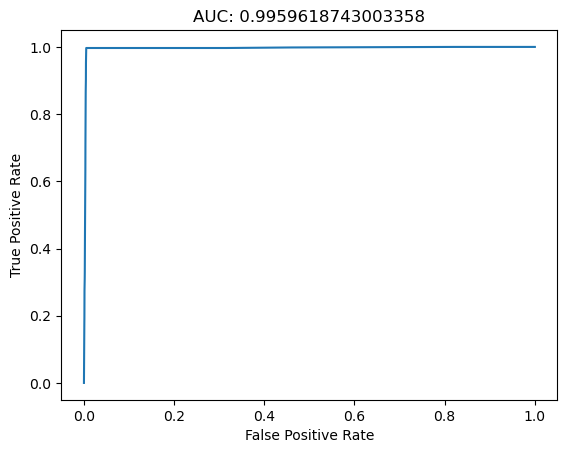

In [122]:
# init the model
lgb = LGBMClassifier(random_state=42)
doMLClassification(lgb, X_train, y_train, X_test, y_test)

In [123]:
# Separate the X variable, the features
X = df.drop(columns=["loan_status"])

# Fit a standard Scaler
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
X_scale = pd.DataFrame(X_scale, columns = X.columns)

# Separate the y variable, the labels
y = df["loan_status"]

# look at X_scale
X_scale.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,0.427304,0.426837,0.427404,0.668571,0.616143,1.043996,0.427404
1,-0.671487,-0.674918,-0.671552,-0.802166,-0.434049,-0.673973,-0.671552
2,-0.384846,-0.370249,-0.372922,-0.344424,-0.434049,-0.673973,-0.372922
3,0.427304,0.417844,0.415459,0.655346,0.616143,1.043996,0.415459
4,0.475078,0.456068,0.451295,0.694873,0.616143,1.043996,0.451295


In [124]:
# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X_scale, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(58152, 7) (58152,)
(19384, 7) (19384,)


TRAINING SET METRICS
[[55957   320]
 [   33  1842]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56277
           1       0.85      0.98      0.91      1875

    accuracy                           0.99     58152
   macro avg       0.93      0.99      0.95     58152
weighted avg       0.99      0.99      0.99     58152


TESTING SET METRICS
[[18669    90]
 [   12   613]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.98      0.92       625

    accuracy                           0.99     19384
   macro avg       0.94      0.99      0.96     19384
weighted avg       1.00      0.99      0.99     19384



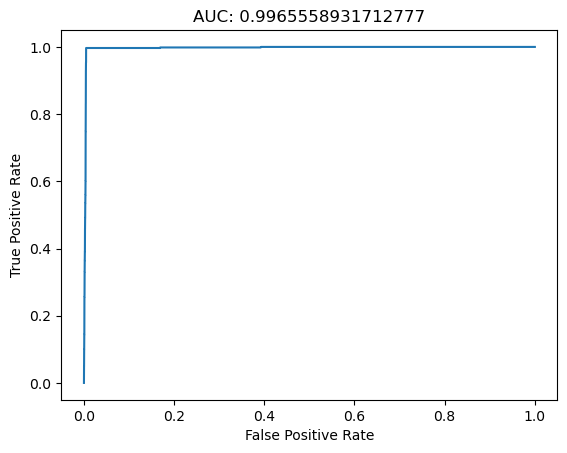

In [125]:
# Instantiate the Logistic Regression model
lr = LogisticRegression()

# Fit the model using training data
doMLClassification(lr, X_train, y_train, X_test, y_test)

---

# Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [126]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
ros = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
X_ros_model, y_ros_model = ros.fit_resample(X,y)

In [127]:
from collections import Counter
# Count the distinct values of the resampled labels data
print(Counter(X_ros_model))
print(Counter(y_ros_model))
print(f"The y_ros_model resampled data is equivalently split")

Counter({'loan_size': 1, 'interest_rate': 1, 'borrower_income': 1, 'debt_to_income': 1, 'num_of_accounts': 1, 'derogatory_marks': 1, 'total_debt': 1})
Counter({0: 75036, 1: 75036})
The y_ros_model resampled data is equivalently split


### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [128]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier = LogisticRegression(solver='lbfgs', random_state=1)

# Fit the model using the resampled training data
classifier.fit(X_ros_model, y_ros_model)
# Make a prediction using the testing data
predictions = classifier.predict(X_ros_model)
pd.DataFrame({'Predictions': predictions, 'Actual': y_ros_model})

,Predictions,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
150067,1,1
150068,1,1
150069,1,1
150070,1,1


### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [129]:
# Print the balanced_accuracy score of the model 
print(f"The balanced accuracy score of the model is: {balanced_accuracy_score(y_ros_model, predictions)}")

The balanced accuracy score of the model is: 0.9945026387334079


In [130]:
# Generate a confusion matrix for the model
cf_matrix = confusion_matrix(y_ros_model, predictions)
cf_matrix  

array([[74614,   422],
       [  403, 74633]], dtype=int64)

In [131]:
# Print the classification report for the model
report = classification_report(y_ros_model, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     75036
           1       0.99      0.99      0.99     75036

    accuracy                           0.99    150072
   macro avg       0.99      0.99      0.99    150072
weighted avg       0.99      0.99      0.99    150072



### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:**The logistic regression model predicts the oversampled data with near-perfect accuracy (>99% accurate)